# Week 4 Capstone assignment - Week 4
## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 4)

*Developer: Dan Grigore* \
*Created on: 2020/02/17* 


This Jupyter notebook cotains the work for the Capstone Project for the IBM Data Science Professional Certificate - Applied Data Science Capstone Course:

**A full description of work and project is presented in the final report in PDF format and in the final presentation at the links below:**

Link 1 <p>
Link 2 <p>

<p>

## 1. Introduction/Business Problem

Chicago is the third most-populous city in The United States and the most populous city in the State of Illinois. Having an estimated population of almost 3 million people, it is a central node of business, communication and transportation in the US.
<p>
<img src="https://github.com/datacrawlers/Coursera_Capstone/tree/master/Final_Project/A_Lit_Chicago_Skyline_Jpg_(109426453).jpeg" width="500"> 
<p>
According to <a href="https://www.inc.com/emily-canal/chicago-startup-city-talent-funding-inc-fast-growth-tour.html">Inc.</a>, Chicago is one of the most hospitable cities for entrepreneurs and startup businesses, contrary to its harsh winters and high competitive environment.
<p>
Among top reasons why one should open a business in this city are:<br>
&emsp;1.	Diverse and healthy business climate<br>
&emsp;2.	Major center for business in the Midwest<br>
&emsp;3.	Easy finding fundraising opportunities<br>
&emsp;4.	Reasonable cost of living<br>
&emsp;5.	Highly valued educational system<p>
With over 300.000 companies based in the city, in a 227 square miles area (<a href="https://www.census.gov/quickfacts/chicagocityillinois">see here the source</a>), it is real problem keeping the working environments clean. <br>
Keeping the business clean is usually a daily objective for most of the companies in order not to:<br>
&emsp;1.	Turn customers away<br>
&emsp;2.	Make employees more productive<br>
&emsp;3.	Keep equipment and in good condition<br>
&emsp;4.	Work in a Safe environment<br>
<p>
Assigning this task to a company team is a good idea, but outsourcing towards a professional cleaning company can reduce cost and increase productivity.<p> 

The advantages of opening a cleaning business are:<br>
&emsp;1.	Can generate revenue quickly<br>
&emsp;2.	Low costs as employees can be kept part-time or from home<br>
&emsp;3.	The commercial cleaning is a very flexible industry, offering the access to a variety of businesses with a variety of needs<p>
There are many businesses in need for cleaning services, but for this research I decided to restrict the results to restaurants, bars and hotels.<p>
    
My objective for this analysis is to identify the best place in Chicago for an entrepreneur in the commercial cleaning industry to open a business and offer its services.<p>

The audience for this analysis consists in entrepreneurs and businesses who have thought of opening a commercial cleaning company or of offering cleaning services in Chicago, IL and who are wondering which would be the best places to look for clients.<p>     
    
The problem would be finding a suitable location for the startup, keeping in mind the following restrictions:<br>
&emsp;1.	Must be close to venues in most need of daily cleaning<br>
&emsp;2.	Must have a primary location, close to most popular venues in Chicago supposedly needing cleaning, where employees would be located and wait for requests, keep supplies and inventory<br>
&emsp;3.	Can have other secondary locations, if needed, for helping reducing transportation costs to/from cleaning locations<br>
&emsp;4.	The startup will concentrate mostly on restaurant, bar and hotel businesses<br>
<p>
    

## 2. Data - Description of Data and how it will be used to solve the problem<p>

The steps for getting the answers to solve the problem are the following:<br>
&emsp;2.	Data<br>
&emsp;&emsp;2.1.	List of zones in Chicago with geospatial information<br>
&emsp;&emsp;2.2.	Prepare postal code data<br>
&emsp;&emsp;2.3.	Foursquare access and request to analyze venues and their characteristics<br>
&emsp;3.	Explore the data<br>
&emsp;4.	Clustering data<br>
&emsp;5.	Offer results based on analysis<br>
&emsp;6.	Discussion of the resulted information<br>
&emsp;7.	Conclusion<p>

#### 2.1.1.	**Download the list of zones in Chicago with geospatial information**<br>
Due to lack of information regarding neighborhoods geo data, I have chosen to use **The Free Postal Code Data for US** from <a href="http://download.geonames.org/export/zip/">geonames.org</a>. <br>I am creating a data frame with the resulting data by filtering only the postal codes of Chicago, IL.<p>
_See the code below_<p>

&emsp; **Download the list of zones in Chicago with geospatial information**<br>

In [2]:
#Prepare environment
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

&emsp; **Load geographical coordinates from the CSV file into a dataframe**

In [3]:
#Load geograpgical coordinates from the CSV file into a dataframe
nomi = pd.read_table('./US.txt', names=('CountryCode', 'PostalCode', 'Place_Name','State_Name','State_Code','County_Name', 'County_Code','Community_Name','Community_Code','Latitude','Longitude','Accuracy'))
print('Data downloaded!')
nomi.head()

Data downloaded!


,CountryCode,PostalCode,Place_Name,State_Name,State_Code,County_Name,County_Code,Community_Name,Community_Code,Latitude,Longitude,Accuracy
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0


_As you can see above, there are 12 columns describing the Chicago Postal Codes:<br>
&emsp;1. CountryCode<br>
&emsp;2. **PostalCode* - used in my future analysis**<br>
&emsp;3. **Place_Name - City - used in my future analysis**<br>
&emsp;4. **State_Name - State - used in my future analysis**<br>
&emsp;5. **State_Code - used in my future analysis**<br>
&emsp;6. County_Name<br>
&emsp;7. County_Code<br>
&emsp;8. Community_Name<br>
&emsp;9. Community_Code<br>
&emsp;10. **Latitude - used in my future analysis**<br>
&emsp;11. **Longitude -used in my future analysis**<br>
&emsp;12. Accuracy_<br>

#### **2.2. Clean and prepare data: I am filtering only the Chicago, IL postal codes and drop several postal codes with same lat and lang, but keeping only the first such record**

In [4]:
city_filter=nomi['Place_Name']=='Chicago'
state_filter = nomi['State_Code']=='IL'
nomi2 = nomi[city_filter & state_filter]
nomi2.head()

,CountryCode,PostalCode,Place_Name,State_Name,State_Code,County_Name,County_Code,Community_Name,Community_Code,Latitude,Longitude,Accuracy
10574,US,60601,Chicago,Illinois,IL,Cook,31.0,NaN,NaN,41.8858,-87.6181,4.0
10575,US,60602,Chicago,Illinois,IL,Cook,31.0,NaN,NaN,41.8829,-87.6321,4.0
10576,US,60603,Chicago,Illinois,IL,Cook,31.0,NaN,NaN,41.8798,-87.6285,4.0
10577,US,60604,Chicago,Illinois,IL,Cook,31.0,NaN,NaN,41.8785,-87.6330,4.0
10578,US,60605,Chicago,Illinois,IL,Cook,31.0,NaN,NaN,41.8713,-87.6277,4.0


In [5]:
print('The Chicago Postal Codes dataframe contains {} rows'.format(len(nomi2)))

The Chicago Postal Codes dataframe contains 84 rows


In [6]:
nomi2 = nomi2.drop_duplicates()
nomi2 = nomi2.reset_index(drop = True)
nomi2.drop(['Community_Name','Community_Code','County_Name','County_Code'], axis=1, inplace=True)
#duplicateRowsDF = nomi2[nomi2.duplicated(['Latitude', 'Longitude'])]
nomi2 = nomi2.drop_duplicates(subset=['Longitude', 'Latitude'], keep='first')
nomi2.head()

,CountryCode,PostalCode,Place_Name,State_Name,State_Code,Latitude,Longitude,Accuracy
0,US,60601,Chicago,Illinois,IL,41.8858,-87.6181,4.0
1,US,60602,Chicago,Illinois,IL,41.8829,-87.6321,4.0
2,US,60603,Chicago,Illinois,IL,41.8798,-87.6285,4.0
3,US,60604,Chicago,Illinois,IL,41.8785,-87.6330,4.0
4,US,60605,Chicago,Illinois,IL,41.8713,-87.6277,4.0


&emsp; **Get the geospatial coordinates for Chicago, IL**

In [7]:
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="is_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago, IL are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago, IL are 41.8755616, -87.6244212.


&emsp; **Create the Chicago postal codes map**

In [8]:
# create map of Manhattan using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(nomi2['Latitude'], nomi2['Longitude'], nomi2['PostalCode'].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

<img src="chicago_map1.jpeg">

#### **2.3. Foursquare access and request to analyze venues and their characteristics - I am using the Venues endpoint to search for most popular venues in the Chicago area, for the resulting postal codes.**

_See sample code below_

In [9]:
CLIENT_ID = 'YAIC1JOAXI5FEU5FYLNKR230IMWW3Y5IR1D3VHI20DP5UEKR' # your Foursquare ID
CLIENT_SECRET = 'GIHEHIFK4HAB2ZXTLNFSMZA3ZZD1DDCDJG4Y4GWFTBQVORV3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YAIC1JOAXI5FEU5FYLNKR230IMWW3Y5IR1D3VHI20DP5UEKR
CLIENT_SECRET:GIHEHIFK4HAB2ZXTLNFSMZA3ZZD1DDCDJG4Y4GWFTBQVORV3


In [10]:
chicago_data = nomi2.reset_index(drop=True)
chicago_data.loc[0,'PostalCode']

60601

In [11]:
no_latitude = chicago_data.loc[0, 'Latitude'] # postcode latitude value
no_longitude = chicago_data.loc[0, 'Longitude'] # postcode longitude value

no_name = chicago_data.loc[0, 'PostalCode'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(no_name, 
                                                               no_latitude, 
                                                               no_longitude))

Latitude and longitude values of 60601 are 41.8858, -87.6181.


In [12]:
# type your answer here
LIMIT = 100
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    no_latitude, 
    no_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YAIC1JOAXI5FEU5FYLNKR230IMWW3Y5IR1D3VHI20DP5UEKR&client_secret=GIHEHIFK4HAB2ZXTLNFSMZA3ZZD1DDCDJG4Y4GWFTBQVORV3&v=20180605&ll=41.8858,-87.6181&radius=500&limit=100'

_As you can see below, the returned JSON file contains information for the first 100 most popular venues. Each venue has important information for the future analysis such as name, category, latitude and longitude._

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e546ba39fcb92001b9004ab'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Near East Side',
  'headerFullLocation': 'Near East Side, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 88,
  'suggestedBounds': {'ne': {'lat': 41.890300004500006,
    'lng': -87.61206676827555},
   'sw': {'lat': 41.8812999955, 'lng': -87.62413323172444}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0a0546f964a520292123e3',
       'name': 'Lakeshore East Park',
       'location': {'address': 'N Field Blvd',
        'crossStreet': 'Benton Place',
        'lat': 41.88608077508668,
        'lng': -87

### **3.Explore the data**<br>
After reviewing the information, I am filtering the categories by restaurants, bars and hotels.<br>
I will calculate the total number of venues by each of these categories and I also calculate a total for each postal code.<br>
For the resulted Python dataframe, I am selecting the top 15 postal codes, by total number of venues and create a bar chart to visually display the information.<br>

**Create a function that extracts the category of the venue**

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Create a dataframe presenting the nearby venues for a location**

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

nearby_vanues2 = nearby_venues.groupby('categories').agg('count').drop(['lat','lng'],axis=1)

**Create function getNearbyVenues which inserts into the venues_list dataframe the venues from Foursquare from all areas**

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# type your answer here

chicago_venues = getNearbyVenues(names=chicago_data['PostalCode'],
                                   latitudes=chicago_data['Latitude'],
                                   longitudes=chicago_data['Longitude']
                                  )


60601
60602
60603
60604
60605
60606
60607
60608
60609
60610
60611
60612
60613
60614
60615
60616
60617
60618
60619
60620
60621
60622
60623
60624
60625
60626
60628
60629
60630
60631
60632
60633
60634
60636
60637
60638
60639
60640
60641
60642
60643
60644
60645
60646
60647
60649
60651
60652
60653
60654
60655
60656
60657
60659
60660
60661
60664
60666
60682
60686
60688
60689
60695
60696


**Group the venues by postal codes, summing them up and returning a count**

In [21]:
print(chicago_venues.shape)
chicago_venues.head(10)

chicago_venues.groupby('PostalCode').agg('count')
#chicago_venues.set_index('PostalCode').groupby('PostalCode').agg('count')

(2176, 7)


,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
PostalCode,,,,,,
60601,88,88,88,88,88,88
60602,100,100,100,100,100,100
60603,100,100,100,100,100,100
60604,100,100,100,100,100,100
60605,69,69,69,69,69,69
60606,100,100,100,100,100,100
60607,42,42,42,42,42,42
60608,17,17,17,17,17,17
60609,7,7,7,7,7,7


**Identify all unique categories for venues**

In [22]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 264 uniques categories.


**Get the number aggregated, while chooosing all venues containing the phrases "Restaurant", "Hotel" or "Bar" in their category title**

In [23]:
# one hot encoding to get the numbers aggregated
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['PostalCode'] = chicago_venues['PostalCode'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

# drop all rows with no vanue
chicago_onehot = chicago_onehot[(chicago_onehot.T != 0).any()]

chicago_onehot.head()

chicago_summary = chicago_onehot.groupby('PostalCode').agg('sum')

# drop all rows with no vanue
chicago_summary = chicago_summary[(chicago_summary.T != 0).any()]

chicago_summary = chicago_summary.loc[:, (chicago_summary != 0).any(axis=0)]

chicago_summary['Total_Vanues'] = chicago_summary.sum(axis=1)

#chicago_summary

df2 = chicago_summary.filter(regex='Restaurant')

df2['Total_Restaurants'] = df2.sum(axis=1)

df2['Total_Hotels']  = chicago_summary['Hotel']

df2['Total_Bars'] = chicago_summary['Bar']

df2['Total_Venues'] = df2.sum(axis=1)

df3 = df2.filter(['PostalCode','Total_Restaurants','Total_Hotels','Total_Bars'], axis=1)

df3['Total_Venues'] = df3.sum(axis=1)

df3

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Total_Restaurants,Total_Hotels,Total_Bars,Total_Venues
PostalCode,,,,
60601,9,4,1,14
60602,27,6,0,33
60603,22,6,2,30
60604,25,5,1,31
60605,15,3,0,18
60606,34,1,4,39
60607,12,0,1,13
60608,2,0,1,3
60609,3,0,0,3


**Get the top 15 areas by total venues (bars, restaurants and hotels) and display the bar graph**

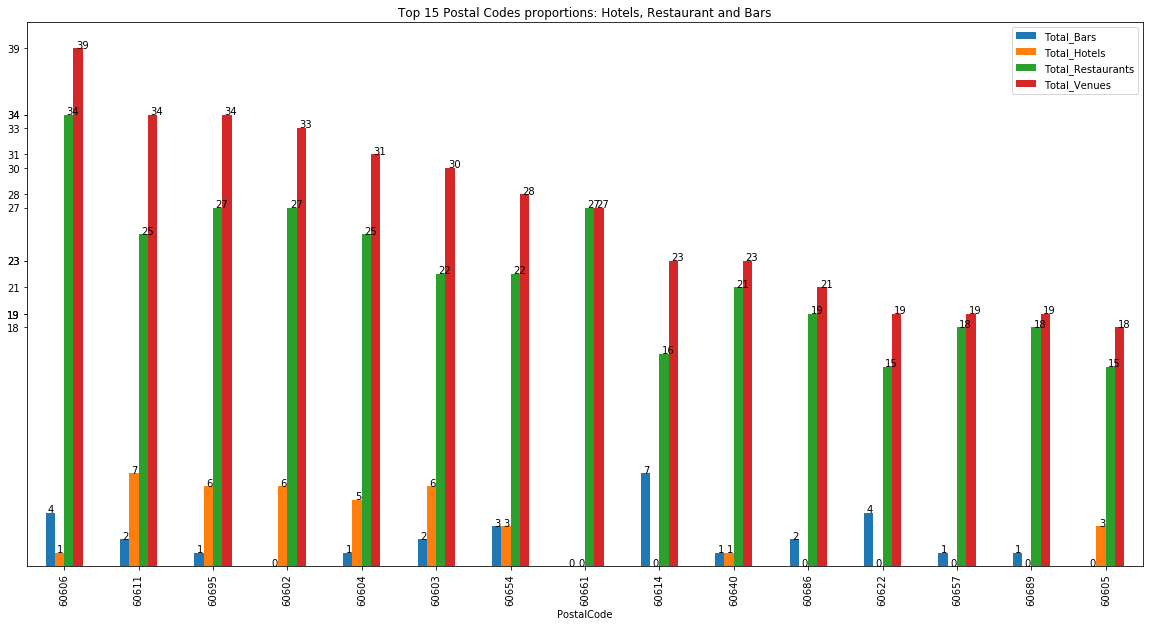

In [34]:
top15 = df3.nlargest(15,'Total_Venues')

#top10

ax = top15.plot.bar(y={'Total_Bars','Total_Hotels','Total_Restaurants','Total_Venues'},stacked=False,figsize=(20,10),title='Top 15 Postal Codes proportions: Hotels, Restaurant and Bars',yticks=top15['Total_Venues'])

'''
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
'''

x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    
ax

**Some information about the shape of the new dataframe top15**

In [25]:
chicago_onehot.shape

(2176, 265)

**Create a dataframe chicago_group, grouped by PostalCode and displayed the mean values, with a reset of index**

In [26]:
chicago_grouped = chicago_onehot.groupby('PostalCode').mean().reset_index()
chicago_grouped.head()

,PostalCode,ATM,Accessories Store,Adult Boutique,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Stadium,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Factory,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Heliport,Historic Site,Hobby Shop,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Opera House,Optical Shop,Other Great Outdoors,Outdoor Supply Store,Outlet Store,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Train Station,Travel & Transport,Travel Lounge,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,60601,0.0,0.0,0.0,0.011364,0.011364,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.00,0.011364,0.0,0.0,0.00,0.0,0.00,0.011364,0.011364,0.0,0.0,0.011364,0.000000,0.022727,0.0,0.0,0.0

**Reset the index for top15**

In [27]:
top15.reset_index(inplace=True)
top15

,PostalCode,Total_Restaurants,Total_Hotels,Total_Bars,Total_Venues
0,60606,34,1,4,39
1,60611,25,7,2,34
2,60695,27,6,1,34
3,60602,27,6,0,33
4,60604,25,5,1,31
5,60603,22,6,2,30
6,60654,22,3,3,28
7,60661,27,0,0,27
8,60614,16,0,7,23
9,60640,21,1,1,23


**Display the top 10 venues by frequency for each postal code in top15 dataframe**

In [31]:
num_top_venues = 10

for hood in top15['PostalCode'].astype(str):
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['PostalCode'].astype(str) == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----60606----
                           venue  freq
0                 Sandwich Place  0.07
1        New American Restaurant  0.06
2                     Donut Shop  0.04
3                     Steakhouse  0.04
4            American Restaurant  0.04
5                            Bar  0.04
6                    Coffee Shop  0.04
7       Mediterranean Restaurant  0.03
8  Vegetarian / Vegan Restaurant  0.03
9             Seafood Restaurant  0.03


----60611----
                     venue  freq
0      American Restaurant  0.10
1                    Hotel  0.08
2           Clothing Store  0.07
3               Restaurant  0.04
4  New American Restaurant  0.04
5              Coffee Shop  0.03
6      Sporting Goods Shop  0.03
7                 Tea Room  0.02
8       Salon / Barbershop  0.02
9                      Bar  0.02


----60695----
                venue  freq
0      Sandwich Place  0.10
1         Coffee Shop  0.08
2               Hotel  0.06
3             Theater  0.06
4  Italian Restaurant 

**Create a function to display most common venues**

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**In a new dataframe, create columns according to number of top venues and display by postal code**

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
chicago_venues_sorted = pd.DataFrame(columns=columns)
chicago_venues_sorted['PostalCode'] = chicago_grouped['PostalCode']

for ind in np.arange(chicago_grouped.shape[0]):
    chicago_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

    chicago_venues_sorted2 = chicago_venues_sorted.loc[chicago_venues_sorted['PostalCode'].isin(top15['PostalCode'])]
    chicago_venues_sorted2.reset_index(inplace=True)
    
chicago_venues_sorted2

,index,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,60602,Coffee Shop,Sandwich Place,Hotel,Italian Restaurant,Theater,Donut Shop,Salad Place,Mediterranean Restaurant,Mexican Restaurant,Indian Restaurant
1,2,60603,Coffee Shop,Sandwich Place,Hotel,Italian Restaurant,Museum,Public Art,Shoe Store,Burger Joint,Salad Place,Café
2,3,60604,Coffee Shop,Sandwich Place,Hotel,American Restaurant,Italian Restaurant,Salad Place,Convenience Store,Mexican Restaurant,Gym,Plaza
3,4,60605,Gym / Fitness Center,Pizza Place,American Restaurant,Hotel,Burger Joint,Coffee Shop,Taco Place,Tapas Restaurant,Furniture / Home Store,Dance Studio
4,5,60606,Sandwich Place,New American Restaurant,Bar,Steakhouse,American Restaurant,Donut Shop,Coffee Shop,Gourmet Shop,Juice Bar,Seafood Restaurant
5,10,60611,American Restaurant,Hotel,Clothing Store,Restaurant,New American Restaurant,Coffee Shop,Sporting Goods Shop,Donut Shop,Pizza Place,Cosmetics Shop
6,13,60614,Bar,Pizza Place,Sandwich Place,Coffee Shop,Gym / Fitness Center,Hot Dog Joint,Theater,Mexican Restaurant,Breakfast Spot,Thai Restaurant
7,21,60622,Bar,Café,Italian Restaurant,Sushi Restaurant,Coffee Shop,Bakery,Salon / Barbershop,Pizza Place,Pet Store,Sandwich Place
8,37,60640,Vietnamese Restaurant,Chinese Restaurant,Coffee Shop,Grocery Store,Music Venue,Thai Restaurant,Bubble Tea Shop,Flea Market,Massage Studio,Jazz Club
9,49,60654,Gym,Steakhouse,Coffee Shop,Italian Restaurant,Gym / Fitness Center,American Restaurant,Hotel,Juice Bar,Breakfast Spot,Seafood Restaurant


### **4. Clustering**<br>
For the resulted top 15 postal codes, I am going to cluster them based on the similarities of venues categories, using the k-means algorithm from the Scikit-learn library.<br>
This step can be repetitive, as we already have chosen the top 15 postal codes with most popular venues as restaurants, bars and hotels, but we want to find out if the postal codes will be clustered respecting the requirements, and also identify the best postal code for opening the business (close location to the others, but visually in the center of the cluster).

**Prepare for clustering**

In [30]:
# set number of clusters
kclusters = 3

chicago_grouped_clustering =chicago_grouped.drop('PostalCode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:25] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1], dtype=int32)

**Add cluster labels**

In [31]:
# add clustering labels

#chicago_venues_sorted.drop(['Cluster Labels'],axis=1,inplace=True)

chicago_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = nomi2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(chicago_venues_sorted.set_index('PostalCode'), on='PostalCode')

# drop all rows with no vanue
chicago_merged = chicago_merged.dropna()

chicago_merged["Cluster Labels"] = chicago_merged["Cluster Labels"].astype(int)

In [32]:
chicago_merged2 = chicago_merged.loc[chicago_merged['PostalCode'].isin(top15['PostalCode'])]

chicago_merged2 # check the last columns!

,CountryCode,PostalCode,Place_Name,State_Name,State_Code,Latitude,Longitude,Accuracy,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,US,60602,Chicago,Illinois,IL,41.8829,-87.6321,4.0,1,Coffee Shop,Sandwich Place,Hotel,Italian Restaurant,Theater,Donut Shop,Salad Place,Mediterranean Restaurant,Mexican Restaurant,Indian Restaurant
2,US,60603,Chicago,Illinois,IL,41.8798,-87.6285,4.0,1,Coffee Shop,Sandwich Place,Hotel,Italian Restaurant,Museum,Public Art,Shoe Store,Burger Joint,Salad Place,Café
3,US,60604,Chicago,Illinois,IL,41.8785,-87.6330,4.0,1,Coffee Shop,Sandwich Place,Hotel,American Restaurant,Italian Restaurant,Salad Place,Convenience Store,Mexican Restaurant,Gym,Plaza
4,US,60605,Chicago,Illinois,IL,41.8713,-87.6277,4.0,1,Gym / Fitness Center,Pizza Place,American Restaurant,Hotel,Burger Joint,Coffee Shop,Taco Place,Tapas Restaurant,Furniture / Home Store,Dance Studio
5,US,60606,Chicago,Illinois,IL,41.8868,-87.6386,4.0,1,Sandwich Place,New American Restaurant,Bar,Steakhouse,American Restaurant,Donut Shop,Coffee Shop,Gourmet Shop,Juice Bar,Seafood Restaurant
10,US,60611,Chicago,Illinois,IL,41.8971,-87.6223,4.0,1,American Restaurant,Hotel,Clothing Store,Restaurant,New American Restaurant,Coffee Shop,Sporting Goods Shop,Donut Shop,Pizza Place,Cosmetics Shop
13,US,60614,Chicago,Illinois,IL,41.9229,-87.6483,4.0,1,Bar,Pizza Place,Sandwich Place,Coffee Shop,Gym / Fitness Center,Hot Dog Joint,Theater,Mexican Restaurant,Breakfast Spot,Thai Restaurant
21,US,60622,Chicago,Illinois,IL,41.9019,-87.6779,4.0,1,Bar,Café,Italian Restaurant,Sushi Restaurant,Coffee Shop,Bakery,Salon / Barbershop,Pizza Place,Pet Store,Sandwich Place
37,US,60640,Chicago,Illinois,IL,41.9719,-87.6624,4.0,1,Vietnamese Restaurant,Chinese Restaurant,Coffee Shop,Grocery Store,Music Venue,Thai Restaurant,Bubble Tea Shop,Flea Market,Massage Studio,Jazz Club
49,US,60654,Chicago,Illinois,IL,41.8923,-87.6373,4.0,1,Gym,Steakhouse,Coffee Shop,Italian Restaurant,Gym / Fitness Center,American Restaurant,Hotel,Juice Bar,Breakfast Spot,Seafood Restaurant


**Create the map**

In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)

ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged2['Latitude'],chicago_merged2['Longitude'], chicago_merged2['PostalCode'],chicago_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
chicago_merged2.loc[chicago_merged2['Cluster Labels'] == 0, chicago_merged2.columns[[1] + list(range(5, chicago_merged2.shape[1]))]]

,PostalCode,Latitude,Longitude,Accuracy,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [40]:
chicago_merged2.loc[chicago_merged2['Cluster Labels'] == 1, chicago_merged2.columns[[1] + list(range(5, chicago_merged2.shape[1]))]]

,PostalCode,Latitude,Longitude,Accuracy,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,60602,41.8829,-87.6321,4.0,1,Coffee Shop,Sandwich Place,Hotel,Theater,Italian Restaurant,Donut Shop,Salad Place,Mediterranean Restaurant,Mexican Restaurant,Burrito Place
2,60603,41.8798,-87.6285,4.0,1,Sandwich Place,Coffee Shop,Hotel,Italian Restaurant,Museum,Public Art,Shoe Store,Asian Restaurant,Dessert Shop,Burger Joint
3,60604,41.8785,-87.6330,4.0,1,Coffee Shop,Sandwich Place,Hotel,American Restaurant,Italian Restaurant,Convenience Store,Salad Place,Mexican Restaurant,Plaza,Theater
5,60606,41.8868,-87.6386,4.0,1,Sandwich Place,New American Restaurant,Bar,American Restaurant,Steakhouse,Donut Shop,Coffee Shop,Gourmet Shop,Juice Bar,Seafood Restaurant
10,60611,41.8971,-87.6223,4.0,1,American Restaurant,Hotel,Clothing Store,New American Restaurant,Restaurant,Coffee Shop,Sporting Goods Shop,Lingerie Store,Women's Store,Shopping Mall
13,60614,41.9229,-87.6483,4.0,1,Bar,Sandwich Place,Pizza Place,Coffee Shop,Hot Dog Joint,Theater,Mexican Restaurant,Yoga Studio,Vietnamese Restaurant,Breakfast Spot
21,60622,41.9019,-87.6779,4.0,1,Bar,Pizza Place,Italian Restaurant,Café,Salon / Barbershop,Sushi Restaurant,Bakery,Pet Store,Coffee Shop,Sports Bar
37,60640,41.9719,-87.6624,4.0,1,Vietnamese Restaurant,Chinese Restaurant,Grocery Store,Thai Restaurant,Bubble Tea Shop,Music Venue,Coffee Shop,Ethiopian Restaurant,Gourmet Shop,Bakery
49,60654,41.8923,-87.6373,4.0,1,Gym,Coffee Shop,Italian Restaurant,Steakhouse,Gym / Fitness Center,American Restaurant,Hotel,Juice Bar,Seafood Restaurant,Sandwich Place
52,60657,41.9399,-87.6528,4.0,1,Coffee Shop,Gay Bar,Spa,Japanese Restaurant,Sandwich Place,Gym,Taco Place,Pizza Place,New American Restaurant,Café


In [41]:
chicago_merged2.loc[chicago_merged2['Cluster Labels'] == 2, chicago_merged2.columns[[1] + list(range(5, chicago_merged2.shape[1]))]]

,PostalCode,Latitude,Longitude,Accuracy,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


**Since we have noticed that all zones are allocated to one cluster we one to verify again using statistical methods**

**1. Elbow method**

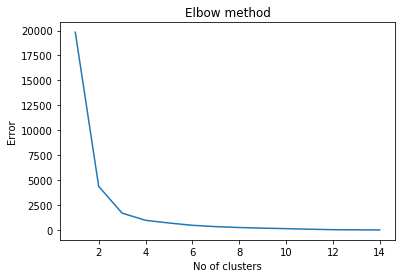

In [43]:
Error =[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i).fit(top15)
    kmeans.fit(top15)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 15), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [44]:
kmeans3= KMeans(n_clusters=3)
y_kmeans3= kmeans3.fit_predict(top15)
print(y_kmeans3)

[0 0 1 0 0 0 2 2 0 2 1 1 0 2 1]


In [45]:
kmeans3.cluster_centers_

array([[6.06088571e+04, 2.32857143e+01, 3.71428571e+00, 3.00000000e+00,
        3.00000000e+01],
       [6.06915000e+04, 2.10000000e+01, 1.50000000e+00, 1.50000000e+00,
        2.40000000e+01],
       [6.06530000e+04, 2.22500000e+01, 1.00000000e+00, 1.25000000e+00,
        2.45000000e+01]])

**Apply chisquare homogeneity test**

In [46]:
from scipy.stats import chisquare
top15.head()

,PostalCode,Total_Restaurants,Total_Hotels,Total_Bars,Total_Venues
0,60606,34,1,4,39
1,60611,25,8,2,35
2,60695,28,6,1,35
3,60602,27,6,0,33
4,60604,25,5,1,31


In [47]:
chisquare(top15['Total_Venues'],axis=None, ddof=[0,1,2,3,4,5])

Power_divergenceResult(statistic=23.499999999999993, pvalue=array([0.05260482, 0.03605318, 0.02376886, 0.01501401, 0.00904411,
       0.00516588]))

### **5. Results**<br>
Postal code 60606 is the top location for opening a cleaning business, as it has 4 bars, 1 hotel and 35 restaurants, totaling 40 venues.<p>

As a possible secondary location, postal code 60611 has a total of 36 venues, with 2 bar, 9 hotels and 25 restaurants.<p>
    
For each of the top 15 postal codes, the most popular venues are displayed and presented. <p>
The most popular venues are the restaurants, while the bars and hotels proportions differ from location to location.<p>
If we would like to offer laundry services also, the zones 60611, 60695, 60602 60603 and 60604 would be of interest, since they do have most of the hotels.<p>
Zones 60606, 60614 and 60622 have most of the bars from the top 15 areas, and these may require deep cleaning services, such as emptying trash bins, sweep and mop the floor behind the bar, clean refrigerators, remove empty bottles, clean freezers, polishing décor and light fixtures. <p>


### **6. Discussion**
One of the advantages of the solution is that, by choosing the top 15 areas by total number of venues – from bars, restaurants and hotels – a cleaning business can expect to generate quick revenues with low costs. <p>
The cleaning industry is very diverse, but for the core services, depending also on clients’ needs, and choosing the right location of the point of work where to keep inventory and wait for service requests – it can be very rewarding and efficient for the business. <p>
As presented above, area 60606 – is the best for opening a possible cleaning business; not only that it has the most venues, but it is also situated in the close location of the other postal codes; near main transportation nodes, it will have a competitive advantage versus the others. <p>
On the other hand, the second choice for opening 60611 is closed to two areas with similar number of venues, up north Uptown 60640 (23 venues) and Lincoln Park 60614 (23 venues). This location is close to the Chicago Downtown area and it can easily represent a backup location, when needing additional workers or materials.<p>
While trying to cluster the final information, we have noticed that only one cluster is generated with all information, which is usually unusual for the k-means clustering algorithm. In this case, we can assume that the doing additional investigation of the data would offer information on the optimal clusters, either by using the Elbow, Silhouette or the Gap Statistics method. <p>
**Note:** Even though the Elbow Method identified below the optimal number of clusters to be 3, we can definitely say that the chosen dataset is homogeneous enough in order to result only one cluster, containing all areas.<p>
On applying the homogeneity test chi-square, with a significance level of 0.05, we can confirm that all postal codes should be part of the same cluster 1. <p>

### **7. Conclusion**<br>
We have presented in this report the identification of the best location to open a cleaning business in the Chicago area, by analyzing the Foursquare venue data and concluding our results based on top 15 areas by total number of venues (restaurants, bars, hotels).<p>
I have built a model based on the provided venues information and mapped over the geospatial coordinates of the Chicago postal codes. The information was filtered by the total number of venues and presented in a bar chart and analyzed. <p>
Two main locations were found as best candidates for opening a cleaning business in Chicago, based also on the fact that they are nearby most of the restaurants, hotels and bars from the area.<p>
By doing a quick search on Google, we can find indeed many cleaning services business registered in the downtown area, where 60606 and 60611 are two of the most popular postal codes for existing companies in the domain.<p>
As secondary sources of revenue for the business, laundry services can be provided in areas where hotels are in a high number, and deep clean services can be offered in areas where bars are located. <p>
Future research can include additional services offered to other venue categories, based on costs and distance to potential clients.<p>